##  Introduction:

##  Introduction:

This notebook is about Relative risk and we gonna work on pregnency dataset ..

Create a file named risk.py. Write functions named ProbEarly, PropOnTime and ProbLate that take a PMF and compute the fraction of births that fall into each bin. 

Ranges are as follows: 
1. Early ==> <= 37
2. OnTime ==> [38 to 40]
3. Late ==> >= 41

Hint: write a generalized function that these functions call.

Make three PMFs, one for first babies, one for others, and one for all live births. For each PMF, compute the probability of being born early, on time, or late.

In [32]:
import Pmf
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import survey
import first
%matplotlib inline 

## Data Extraction ..

In [13]:
table = survey.Pregnancies()
table.ReadRecords()
outcome_ = np.zeros([len(table.records), 1])

for i in xrange(len(table.records)):
    outcome_[i] = table.records[i].outcome

In [14]:
outcome_

array([[ 1.],
       [ 1.],
       [ 1.],
       ..., 
       [ 2.],
       [ 1.],
       [ 1.]])

In [15]:
alive_counter = 0 

for baby in outcome_:
    if (baby == 1):
        alive_counter = alive_counter + 1
    else:
        continue 

In [17]:
alive_counter

9148

In [18]:
data = table.GetFields()

In [21]:
## read all data in dataframe .. then partition the dataframe table into two tables 
df = pd.DataFrame([])

header =  [case[0] for (i, case) in enumerate(data)]  ## append, appends rows !! 
header = np.transpose(header)
header

array(['caseid', 'nbrnaliv', 'babysex', 'birthwgt_lb', 'birthwgt_oz',
       'prglength', 'outcome', 'birthord', 'agepreg', 'finalwgt'], 
      dtype='|S11')

In [22]:
Value_to_push = []
with open("2002FemPreg.dat","r") as io:
    for l in io:
        if len(l) > 100:
            for (i,case) in enumerate(data):
                try: 
                    Value_to_push.append([case[3](l[case[1]:case[2]])])
#                     print(Value_to_push)
                except ValueError: 
                    continue

In [23]:
partitions = first.PartitionRecords(table)
partitions

(<survey.Pregnancies at 0x7fba3789aa90>,
 <survey.Pregnancies at 0x7fba3789a9d0>)

In [24]:
first_baby = partitions[0]
others = partitions[1]
len(first_baby), len(others)

(4413, 4735)

In [25]:
## tables 
t = first.MakeTables()
original_table = t[0]
firsts_table = t[1]
others_table = t[2]

original_table, firsts_table, others_table

(<survey.Pregnancies at 0x7fba331e9390>,
 <survey.Pregnancies at 0x7fba325c6e10>)

In [26]:
first_baby_ = np.zeros([len(firsts_table.records), 1])

for i in xrange(len(firsts_table.records)):
    try:
        first_baby_[i] = firsts_table.records[i].prglength
    except ValueError:
        first_baby_[i] = 0

In [27]:
first_baby_, len(first_baby_)

(array([[ 39.],
        [ 39.],
        [ 38.],
        ..., 
        [ 39.],
        [ 34.],
        [ 39.]]), 4413)

In [28]:
others_baby_ = np.zeros([len(others_table.records), 1])

for i in xrange(len(others_table.records)):
    try:
        others_baby_[i] = others_table.records[i].prglength
    except ValueError:
        others_baby_[i] = 0

In [29]:
others_baby_, len(others_baby_)

(array([[ 39.],
        [ 39.],
        [ 39.],
        ..., 
        [ 39.],
        [ 39.],
        [ 39.]]), 4735)

In [33]:
merged = list(itertools.chain(*first_baby_))
len(merged)

4413

In [39]:
pmf_first = Pmf.MakePmfFromList(merged)
pmf_first

In [40]:
pmf_first.d.keys(), pmf_first.d.values()

([0.0,
  17.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0],
 [0.00022660321776569228,
  0.00022660321776569228,
  0.00022660321776569228,
  0.00022660321776569228,
  0.0006798096532970768,
  0.00022660321776569228,
  0.0015862225243598459,
  0.00022660321776569228,
  0.0036256514842510764,
  0.00022660321776569228,
  0.005438477226376614,
  0.0020394289598912306,
  0.016542034896895538,
  0.003399048266485384,
  0.012463176977113076,
  0.0063448900974393836,
  0.006571493315205076,
  0.03602991162474507,
  0.03897575345569907,
  0.04713346929526399,
  0.0616360752322683,
  0.47903920235667347,
  0.12145932472241106,
  0.08157715839564922,
  0.04645365964196692,
  0.01971447994561523,
  0.005211874008610923,
  0.0013596193065941536,
  0.00022660321776569228,
  0.00022660321776569228,
  0.00067980965329

## PMF Functions 

In [36]:
# ProbEarly (PMF_) ... return age <= 37

def ProbEarly(index, pmf):
    k_ = []
    v_ = []
    
    for i in xrange(len(index)):
        if(index[i] <= 37):
            k_.append(index[i])
            v_.append(pmf[i])
            
    return k_, v_

In [73]:
def ProbOnTime(index, pmf):
    k__ = []
    v__ = []
    
    for i in xrange(len(index)):
        if(index[i] <= 40 and index[i] >= 38):
            k__.append(index[i])
            v__.append(pmf[i])
            
    return k__, v__

In [38]:
def ProbLate(index, pmf):
    k___ = []
    v___ = []
    
    for i in xrange(len(index)):
        if(index[i] >= 41):
            k___.append(index[i])
            v___.append(pmf[i])
            
    return k___, v___

# 1. First Babies:
## Calling functions and plotting the curves:

In [42]:
k_, v_ = ProbEarly(pmf_first.d.keys(), pmf_first.d.values())
k_, v_

([0.0,
  17.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0],
 [0.00022660321776569228,
  0.00022660321776569228,
  0.00022660321776569228,
  0.00022660321776569228,
  0.0006798096532970768,
  0.00022660321776569228,
  0.0015862225243598459,
  0.00022660321776569228,
  0.0036256514842510764,
  0.00022660321776569228,
  0.005438477226376614,
  0.0020394289598912306,
  0.016542034896895538,
  0.003399048266485384,
  0.012463176977113076,
  0.0063448900974393836,
  0.006571493315205076,
  0.03602991162474507,
  0.03897575345569907,
  0.04713346929526399])

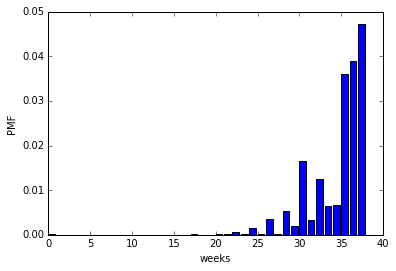

In [44]:
plt.bar(k_, v_)
plt.xlabel('weeks')
plt.ylabel('PMF')

In [74]:
k__, v__ = ProbOnTime(pmf_first.d.keys(), pmf_first.d.values())
k__, v__

([38.0, 39.0, 40.0],
 [0.0616360752322683, 0.47903920235667347, 0.12145932472241106])

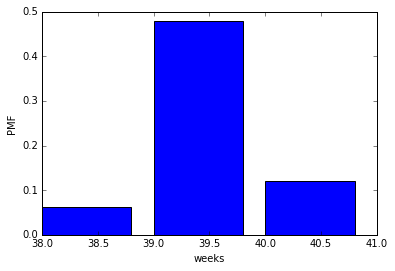

In [75]:
plt.bar(k__, v__)
plt.xlabel('weeks')
plt.ylabel('PMF')

In [68]:
k___, v___ = ProbLate(pmf_first.d.keys(), pmf_first.d.values())
k___, v___

([41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0],
 [0.08157715839564922,
  0.04645365964196692,
  0.01971447994561523,
  0.005211874008610923,
  0.0013596193065941536,
  0.00022660321776569228,
  0.00022660321776569228,
  0.0006798096532970768])

<Container object of 8 artists>

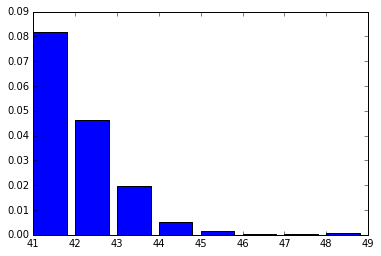

In [69]:
plt.bar(k___, v___)

## Comment:

The above figures demonestrate that probability of a baby to be born early has an increasing shape .. which means that i.e. it is more likely to have a baby in week # 37 than in week # 30 .. 

The distribution of those born on time is almost normal with a peak in week # 39 .. and it is more likely to have a baby in week # 40 than in week # 38 .. 

However, after week # 40 the probability decreases over time .. and it is rare to have baby in week # 49 or later.  

It's more informative to calculate the portion of babies under each range .. hence, let's calculate this .. 

In [76]:
sum(v_), sum(v__), sum(v___) ## the order of these vectors similar to the order of their functions ..

(0.18241559030138227, 0.6621346023113528, 0.15544980738726488)

The majority of babies .. come on time .. 

# 2. Other Babies:

In [77]:
merged_ = list(itertools.chain(*others_baby_))
len(merged_)

4735

In [78]:
pmf_others = Pmf.MakePmfFromList(merged_)
pmf_others

In [79]:
pmf_others.d.keys(), pmf_others.d.values()

([4.0,
  9.0,
  13.0,
  17.0,
  18.0,
  19.0,
  21.0,
  22.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  48.0,
  50.0],
 [0.00021119324181626187,
  0.00021119324181626187,
  0.00021119324181626187,
  0.00021119324181626187,
  0.00021119324181626187,
  0.00021119324181626187,
  0.00021119324181626187,
  0.0008447729672650475,
  0.0012671594508975714,
  0.00042238648363252375,
  0.004012671594508976,
  0.00042238648363252375,
  0.001689545934530095,
  0.0025343189017951427,
  0.013727560718057022,
  0.0025343189017951427,
  0.012671594508975712,
  0.0044350580781415,
  0.006546990496304118,
  0.032101372756071805,
  0.03146779303062302,
  0.05216473072861668,
  0.07074973600844772,
  0.5446673706441394,
  0.12249208025343189,
  0.04794086589229145,
  0.02597676874340021,
  0.012882787750791975,
  0.004857444561774023,
  0.0008447729672650475,
  0.00084477

## Calling functions and plotting the curves:

In [80]:
k_o, v_o = ProbEarly(pmf_others.d.keys(), pmf_others.d.values())
k_o, v_o

([4.0,
  9.0,
  13.0,
  17.0,
  18.0,
  19.0,
  21.0,
  22.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0],
 [0.00021119324181626187,
  0.00021119324181626187,
  0.00021119324181626187,
  0.00021119324181626187,
  0.00021119324181626187,
  0.00021119324181626187,
  0.00021119324181626187,
  0.0008447729672650475,
  0.0012671594508975714,
  0.00042238648363252375,
  0.004012671594508976,
  0.00042238648363252375,
  0.001689545934530095,
  0.0025343189017951427,
  0.013727560718057022,
  0.0025343189017951427,
  0.012671594508975712,
  0.0044350580781415,
  0.006546990496304118,
  0.032101372756071805,
  0.03146779303062302,
  0.05216473072861668])

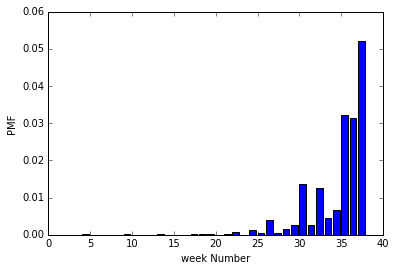

In [82]:
plt.bar(k_o, v_o)
plt.xlabel('week Number')
plt.ylabel('PMF')

In [83]:
k__o, v__o = ProbOnTime(pmf_others.d.keys(), pmf_others.d.values())
k__o, v__o

([38.0, 39.0, 40.0],
 [0.07074973600844772, 0.5446673706441394, 0.12249208025343189])

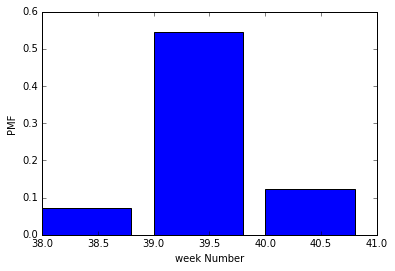

In [84]:
plt.bar(k__o, v__o)
plt.xlabel('week Number')
plt.ylabel('PMF')

In [85]:
k___o, v___o = ProbLate(pmf_others.d.keys(), pmf_others.d.values())
k___o, v___o

([41.0, 42.0, 43.0, 44.0, 45.0, 48.0, 50.0],
 [0.04794086589229145,
  0.02597676874340021,
  0.012882787750791975,
  0.004857444561774023,
  0.0008447729672650475,
  0.0008447729672650475,
  0.00042238648363252375])

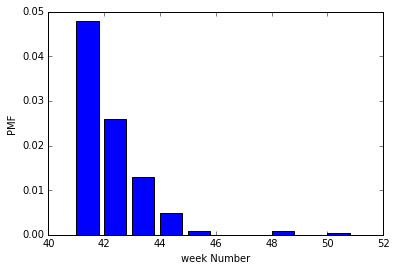

In [86]:
plt.bar(k___o, v___o)
plt.xlabel('week Number')
plt.ylabel('PMF')

## Comment:
The shape of the distributions in Other_babies almost similar to the first_babies .. 
however, there is a sparsity in week # 47 which is not exists in first_babies figure .. 

Let's calculate the portion of babies under each range to be able to compare the results .. 

In [87]:
sum(v_o), sum(v__o), sum(v___o) ## the order of these vectors similar to the order of their functions ..

(0.16832101372756073, 0.737909186906019, 0.09376979936642028)

It is more likely to have baby on time .. neither late nor early .. 

however, the probability for first baby to come on time is less that the other babies .. 

For the other babies, it is more likely to have then early than late .. 

Finally, It is more likely to have first baby early (0.18) than other baby early (0.16) .. 


### Conclusively, 

First babies don't necessarly come late ;) 